# Proyek Analisis Data: BIKE SHARING DATASET

- Nama        : I Made Aritia Pratama Meitalana
- Email       : aritiaagus3@gmail.com
- ID Dicoding : aritiaagus

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah penyewaan sepeda sepanjang waktu?

- Kondisi cuaca seperti apa yang paling mempengaruhi jumlah peminjaman?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv(r'D:\decoding\Bike-sharing-dataset\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv(r'D:\decoding\Bike-sharing-dataset\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Dataset day.csv & hour.csv berisikan kolom instant, dteday, season yang terdiri dari (1:winter, 2:spring, 3:summer, 4:fall)
yr, mnth, hr, holiday, weekday, workingday, weathersit yang terdiri dari (1: Clear, 2: Mist 3: Light Rain, 4: Heavy Rain), temp, atemp, hum, windspeed, casual, registered, cnt

### Assessing Data

**Menilai tabel day_df**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
"Jumlah duplikasi: ", day_df.duplicated().sum()

('Jumlah duplikasi: ', 0)

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai tabel hour_df**

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
"Jumlah duplikasi: ", hour_df.duplicated().sum()

('Jumlah duplikasi: ', 0)

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

- Terdapat kesalahan tipe data untuk kolom **dteday** pada tabel day_df & hour_df
- Tidak ditemukan adanya missing value, duplicate data, serta inaccurate value pada tabel day_df & hour_df

### Cleaning Data

**Memperbaiki tipe data**

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
#mengecek apakah tipe data sudah berubah
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**mengubah label kolom**

In [14]:
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
day_df['season'] = day_df['season'].replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

In [15]:
hour_df['weathersit'] = hour_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})
hour_df['season'] = hour_df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

**Insight:**

membersihkan data day_df dan hour_df dengan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dilakukan dengan function *to_datetime()* yang telah ada pada library pandas. Kemudian mengubah label kolom weathersit & season dari data int menjadi data nominal.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [16]:
day_summary_stats = day_df.describe()
day_unique_counts = day_df.nunique()

In [17]:
day_summary_stats, day_unique_counts

(          instant          yr        mnth     holiday     weekday  workingday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    0.500684    6.519836    0.028728    2.997264    0.683995   
 std    211.165812    0.500342    3.451913    0.167155    2.004787    0.465233   
 min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
 25%    183.500000    0.000000    4.000000    0.000000    1.000000    0.000000   
 50%    366.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
 75%    548.500000    1.000000   10.000000    0.000000    5.000000    1.000000   
 max    731.000000    1.000000   12.000000    1.000000    6.000000    1.000000   
 
              temp       atemp         hum   windspeed       casual  \
 count  731.000000  731.000000  731.000000  731.000000   731.000000   
 mean     0.495385    0.474354    0.627894    0.190486   848.176471   
 std      0.183051    0.162961    0.142429    0

In [18]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
Clear         451
Mist          243
Light Rain     21
Name: cnt, dtype: int64

In [19]:
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
summer    188
spring    182
winter    179
fall      176
Name: cnt, dtype: int64

In [20]:
day_df.groupby(by="weathersit").agg({
    "cnt": "nunique",
    "temp": ["max", "min", "mean", "std"]
})

cnt      temp                             
           nunique       max      min      mean       std
weathersit                                               
Clear          451  0.861667  0.05913  0.511541  0.191165
Light Rain      21  0.633913  0.21750  0.433440  0.131473
Mist           243  0.815000  0.10750  0.470366  0.167180

### Explore hour_df

In [21]:
hour_summary_stats = hour_df.describe()
hour_unique_counts = hour_df.nunique()

In [22]:
hour_summary_stats, hour_unique_counts

(          instant            yr          mnth            hr       holiday  \
 count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
 std     5017.0295      0.500008      3.438776      6.914405      0.167165   
 min        1.0000      0.000000      1.000000      0.000000      0.000000   
 25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
 50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
 75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
 max    17379.0000      1.000000     12.000000     23.000000      1.000000   
 
             weekday    workingday          temp         atemp           hum  \
 count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
 mean       3.003683      0.682721      0.496987      0.475775      0.627229   
 std        2.005771      0.465431      0.192556      0.

In [23]:
hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
Clear         848
Mist          649
Light Rain    368
Heavy Rain      3
Name: cnt, dtype: int64

In [24]:
hour_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
Summer    760
Spring    721
Fall      690
Winter    482
Name: cnt, dtype: int64

In [25]:
hour_df.groupby(by="weathersit").agg({
    "cnt": "nunique",
    "temp": ["max", "min", "mean", "std"]
})

cnt  temp                          
           nunique   max   min      mean       std
weathersit                                        
Clear          848  1.00  0.02  0.511054  0.200775
Heavy Rain       3  0.22  0.14  0.186667  0.041633
Light Rain     368  0.92  0.08  0.456688  0.160509
Mist           649  0.96  0.02  0.474445  0.175933

**Insight:**


**Statistika Deskriptif Day_df**

Jumlah data dari **day_df** sebanyak *731* baris, total Penyewaan (cnt) yang memiliki rata-rata *4504*, suhu (temp) memiliki rentang dari *0.059-0.861*, kelembaban (hum) memiliki rentang dari *0-0.973*, kecepatan angin (windspeed) memiliki rentang dari *0.022-0.507*. Memiliki kategori *4* musim (season) dimana penyewaan paling banyak terjadi pada ***summer sebanyak 188***, weekday memiliki *7* kategori, weathersit memiliki *3* kondisi cuaca saja (clear, Light Rain, Heavy Rain) dimana penyewaan paling banyak terjadi pada ***clear sebanyak 451 dengan suhu max ternormalisasi mencapai 0.86***.

**Statistika Deskriptid Hour_df**

Jumlah data dari **hour_df** sebanyak *17379* baris, cnt yang memiliki rata-rata *189*, temp memiliki rentang dari *0.020-1*, hum memiliki rentang dari *0-1*, windspeed memiliki rentang dari *0-0.851*. Memiliki *4* kategori season dimana penyewaan paling banyak terjadi pada ***summer sebanyak 760***, hr memiliki *24* kategori jam dari *0-23*, weathersit memiliki *4* kondisi cuaca (Clear, Mist, Light Rain, Heavy Rain) dimana penyewaan paling banyak terjadi pada ***clear sebanyak 848 dengan suhu max ternormalisasi mencapai 1.00***.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

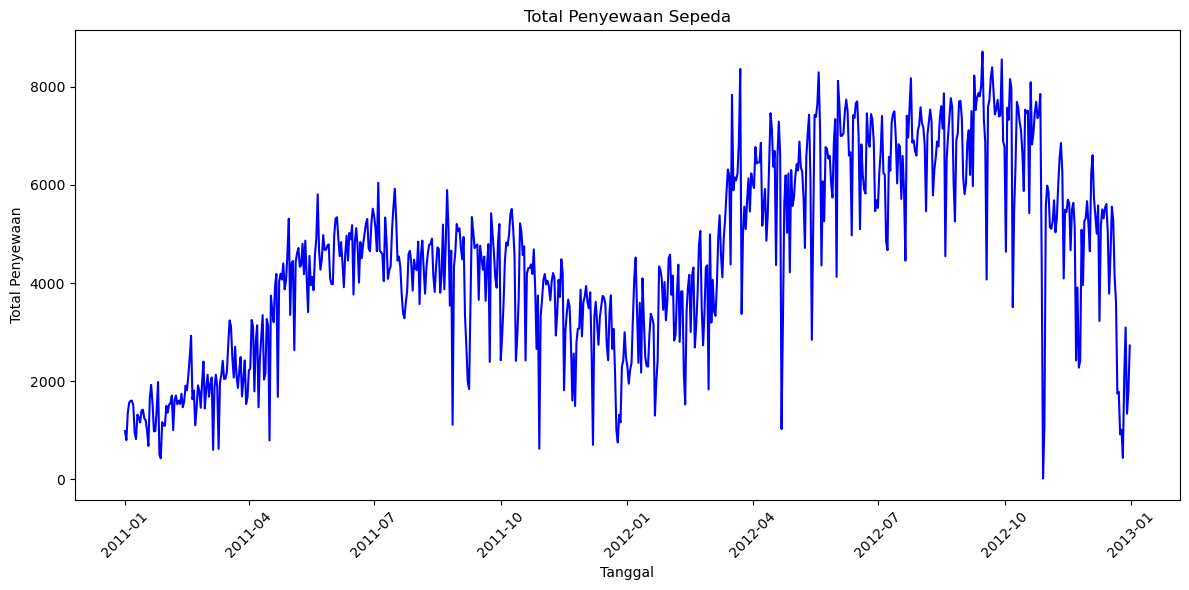

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', color='blue')
plt.title("Total Penyewaan Sepeda")
plt.xlabel("Tanggal")
plt.ylabel("Total Penyewaan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan :

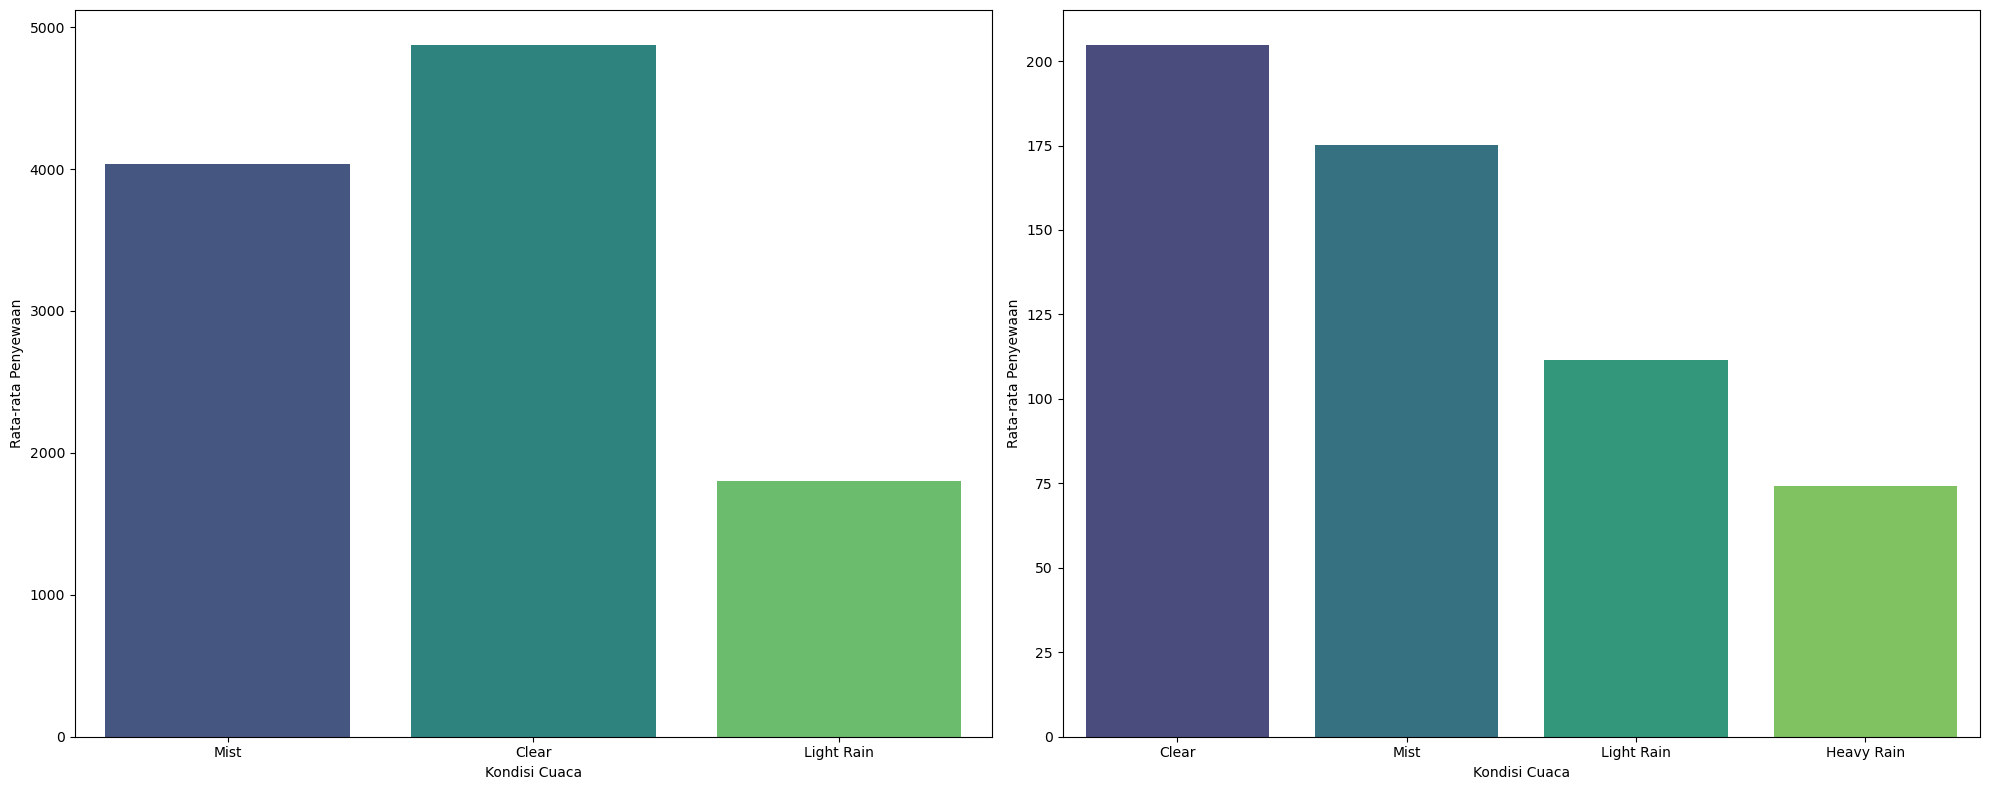

In [27]:
#plot diagram batang
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,8))

#diagram batang untuk day_df
sns.barplot(data=day_df, x='weathersit', y='cnt', errorbar=None, palette="viridis", ax=ax1)
ax1.set_xlabel("Kondisi Cuaca")
ax1.set_ylabel("Rata-rata Penyewaan")

#diagram batang untuk hour_df
sns.barplot(data=hour_df, x='weathersit', y='cnt', errorbar=None, palette="viridis", ax=ax2)
ax2.set_xlabel("Kondisi Cuaca")
ax2.set_ylabel("Rata-rata Penyewaan")

#tampilkan plot diagram
plt.tight_layout()
plt.show()

**Insight:**


**1. Total Penyewaan Dalam Hari**
- Jumlah penyewaan sepeda menunjukkan tren meningkat sepanjang waktu
- Tren cenderung lebih rendah saat akhir tahun dan akan kembali meningkat setelahnya

**2. Rata-rata Penyewaan Dalam Jam Berdasarkan Kondisi Cuaca**
- Penyewaan sepeda tertinggi terjadi saat cuaca sedang cerah (weasthersit = 1)
- Cuaca buruk mempengaruhi tingkat penyewaan sepeda, seperti saat hujan lebat (weasthersit = 4)

# ANALISIS LANJUTAN

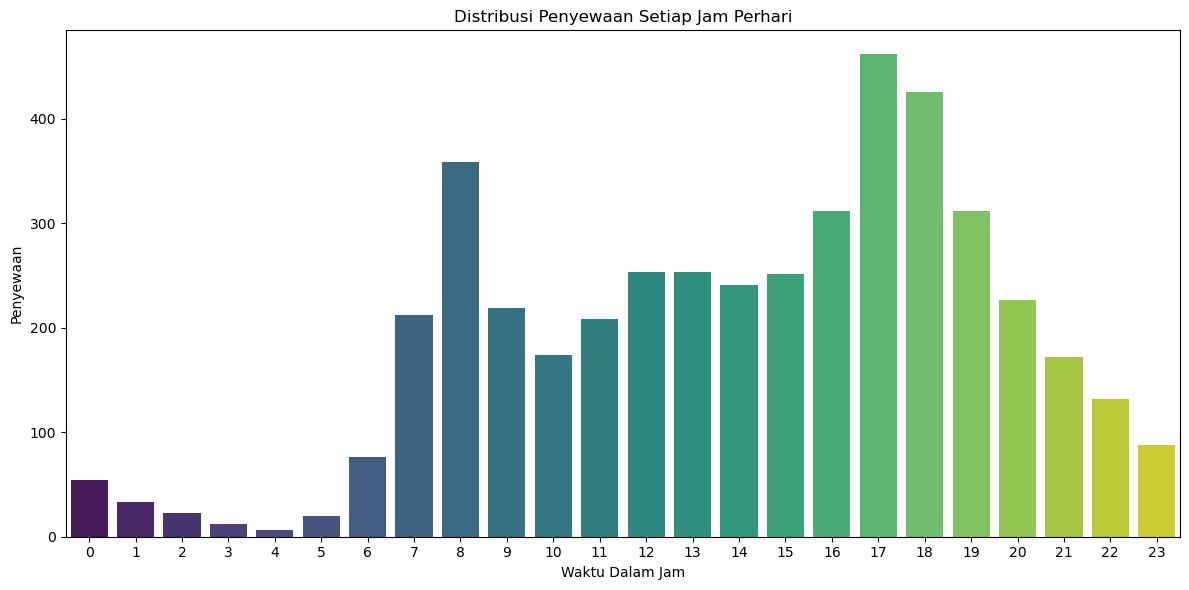

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=hour_df, x='hr', y='cnt', errorbar=None, palette="viridis")
plt.title("Distribusi Penyewaan Setiap Jam Perhari")
plt.xlabel("Waktu Dalam Jam")
plt.ylabel("Penyewaan")
plt.tight_layout()
plt.show()

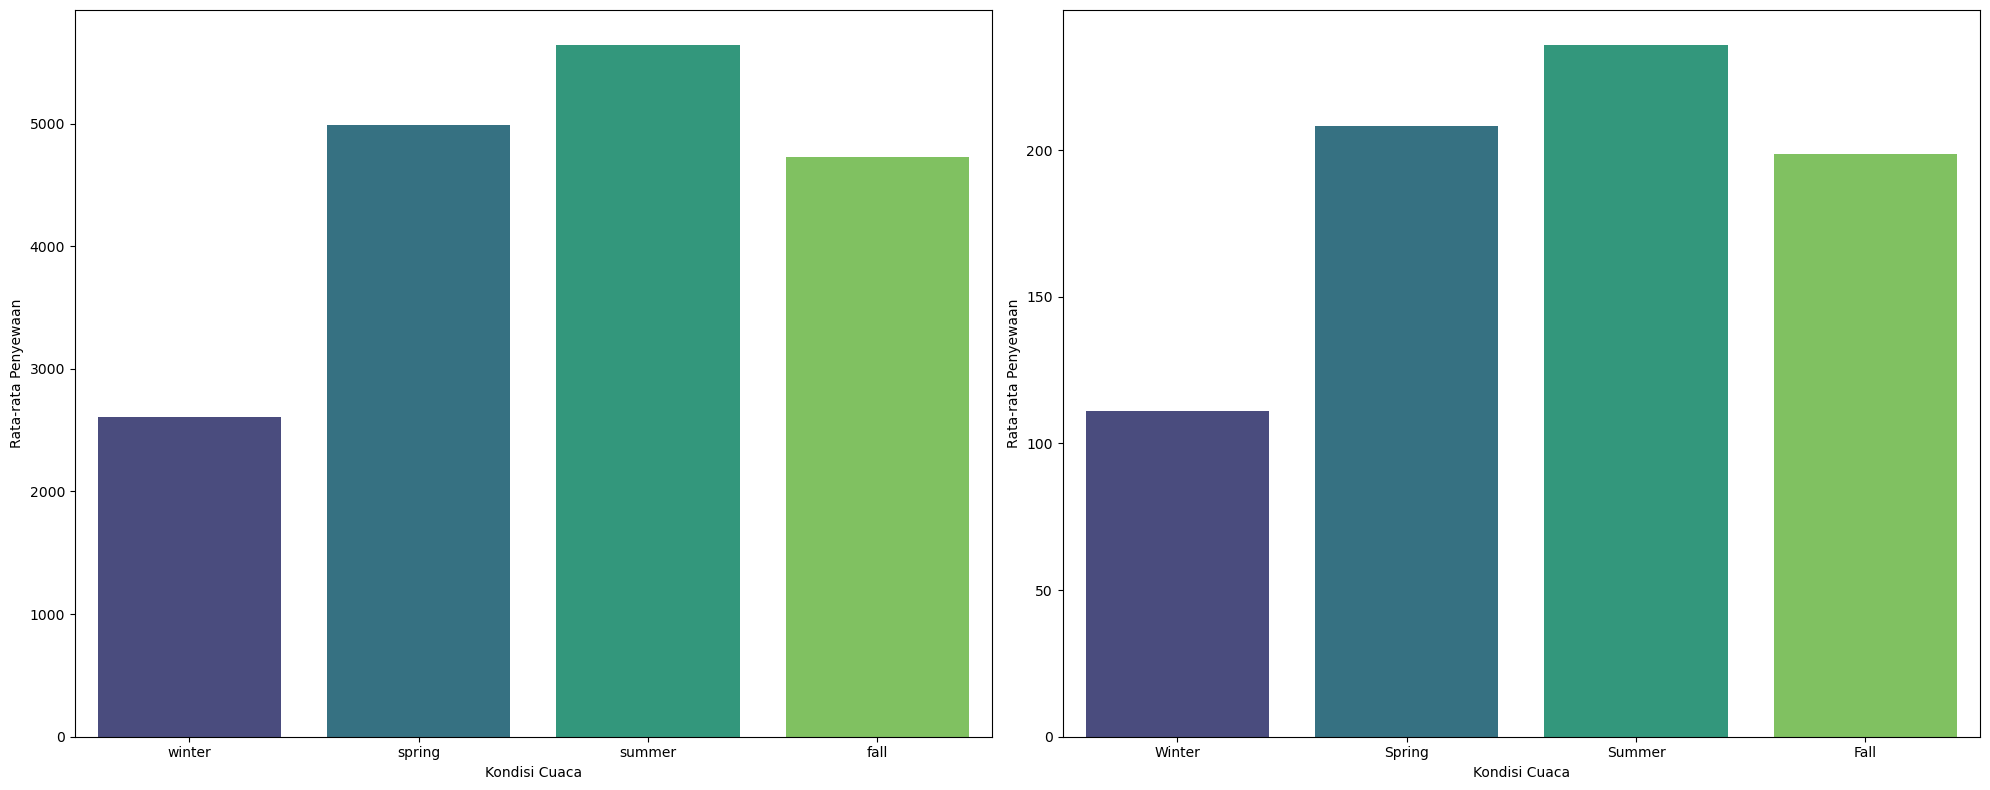

In [29]:
#plot diagram batang
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,8))

#diagram batang untuk day_df
sns.barplot(data=day_df, x='season', y='cnt', errorbar=None, palette="viridis", ax=ax1)
ax1.set_xlabel("Kondisi Cuaca")
ax1.set_ylabel("Rata-rata Penyewaan")

#diagram batang untuk hour_df
sns.barplot(data=hour_df, x='season', y='cnt', errorbar=None, palette="viridis", ax=ax2)
ax2.set_xlabel("Kondisi Cuaca")
ax2.set_ylabel("Rata-rata Penyewaan")

#tampilkan plot diagram
plt.tight_layout()
plt.show()

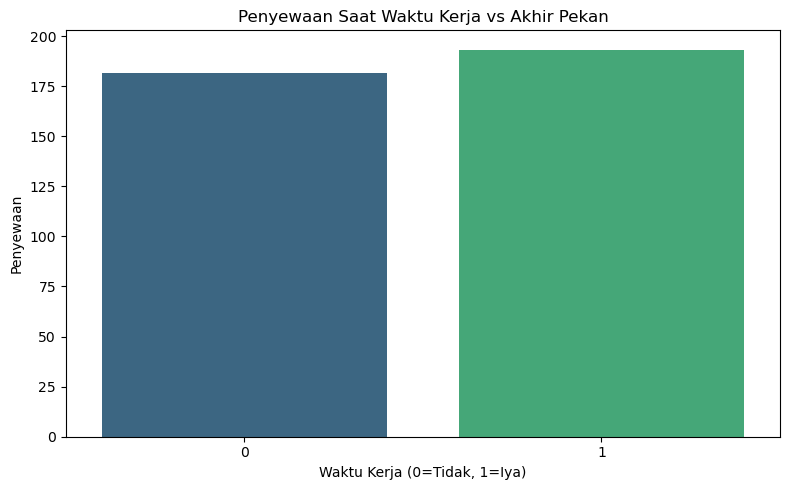

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(data=hour_df, x='workingday', y='cnt', errorbar=None, palette="viridis")
plt.title("Penyewaan Saat Waktu Kerja vs Akhir Pekan")
plt.xlabel("Waktu Kerja (0=Tidak, 1=Iya)")
plt.ylabel("Penyewaan")
plt.tight_layout()
plt.show()

## Conclusion

1. **Bagaimana jumlah penyewaan sepeda sepanjang waktu?**

Tren penyewaan sepeda menurun pada akhir tahun dimana saat itu sedang musim dingin, kemudian tren kembali naik setelah musim dingin berakhir. **Rekomendasi** yang dapat diberikan kepada pengembang bisnis adalah merencanakan operasional dimana stok sepeda ditambah setelah musim dingin dan dapat melakukan perawatan sepeda serta melakukan promosi pada musim dingin saat penyewaan mulai menurun.

2. **Kondisi cuaca seperti apa yang paling mempengaruhi jumlah peminjaman?**

Banyak sedikitnya penyewaan bergantung kepada kondisi cuaca. Cuaca yang buruk seperti hujan bahkan salju sangat berdampak kepada penyewaan sepeda. **Rekomendasi** yang dapat diberikan kepada pengembang bisnis adalah meninjau ulang layanan agar lebih fleksibel agar orang dapat dengan mudah mengakses tempat selama cuaca buruk, serta dilakukan promosi keunggulan sepeda dengan melengkapi fasilitas seperti diberikan pakaian pelindung agar penyewa tidak kebasahan menggunakan sepeda saat cuaca buruk.